In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)

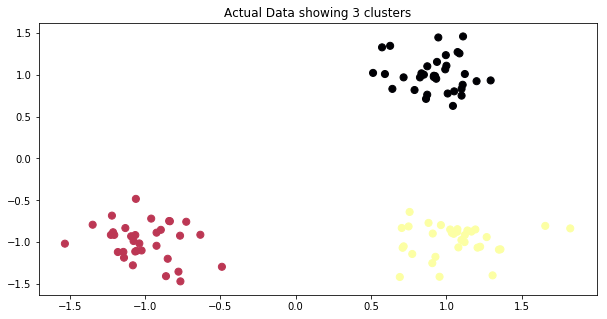

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 3 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno')

In [22]:
 class DBSCAN(object):
        def __init__(self,X,eps,minpt):
            self.X=X
            self.minpt=minpt
            self.eps=eps
            
        def nbd_idx(self,p):
            nbd=np.zeros(self.X.shape[0])
            for i in range(self.X.shape[0]):
                if np.linalg.norm(p-self.X[i])<self.eps:
                    nbd[i]=1
            return nbd
        
        def get_clust(self):
            clust=np.zeros(self.X.shape[0])
            cl=0
            for i in range(self.X.shape[0]):
                if clust[i]==0:
                    nbd=self.nbd_idx(self.X[i])
                    if len(nbd[nbd==1])>=self.minpt:
                        cl=cl+1
                        clust[nbd==1]=cl
            return clust                   

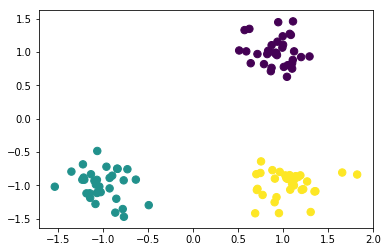

In [21]:
method=DBSCAN(X,1,3)
cy=method.get_clust()
plt.scatter(X[:,0],X[:,1],c=cy,s=55)